# SLIDING WINDOW

## SUBSTRING ANAGRAMS

Given two strings, `s` and `t`, both consisting of lowercase English letters, return the number of substrings in `s` that are anagrams of `t`.

An anagram is a word or phrase formed by rearranging the letters of another word or phrase, using all the original letters exactly once.

Example:
Input: `s = 'caabab'`, `t = 'aba'`
Output: `2`
Explanation: There is an anagram of `t` starting at index 1 ("caabab") and another starting at index 2 ("caabab").

In [19]:
def substring_anagrams(s: str, t: str) -> int:
    # Get the lengths of the strings s and t
    len_s, len_t = len(s), len(t)

    # If t is longer than s, there can't be any anagrams of t in s
    if len_t > len_s:
        return 0

    # Initialize the count of anagrams found
    count = 0

    # Initialize frequency arrays for characters in t and the current window in s
    expected_freqs, window_freqs = [0] * 26, [0] * 26

    # Populate the expected frequency array with characters from t
    for char in t:
        expected_freqs[ord(char) - ord("a")] += 1

    # Initialize the sliding window pointers
    left = right = 0

    # Slide the window over s
    while right < len_s:
        # Add the character at the right pointer to the window frequency array
        window_freqs[ord(s[right]) - ord("a")] += 1

        # Check if the window length is equal to the length of t
        if right - left + 1 == len_t:
            # If the frequency arrays match, we found an anagram
            if window_freqs == expected_freqs:
                count += 1
            # Remove the character at the left pointer from the window frequency array
            window_freqs[ord(s[left]) - ord("a")] -= 1
            # Move the left pointer to the right
            left += 1

        # Move the right pointer to the right
        right += 1

    return count


# Input:
s = "caabab"
t = "aba"

# Call the function and print the result
substring_anagrams(s, t)

2

## LONGEST SUBSTRING W/ UNIQUE CHARACTERS

### sliding window w/ no optimization

In [18]:
def longest_substring_with_unique_chars(s: str) -> int:
    # define variables
    len_s = len(s)
    max_len = 0
    hash_set = set()
    left = right = 0

    while right < len_s:
        while s[right] in hash_set:
            hash_set.remove(s[left])
            left += 1
        max_len = max(max_len, right - left + 1)
        hash_set.add(s[right])
        # expand the window
        right += 1
    return max_len


s = "abcba"

print(longest_substring_with_unique_chars(s))

3


### sliding window w/ optimization - unique chars

In [27]:
def longest_substring_with_unique_chars_optimized(s: str) -> int:
    # define constants
    len_s = len(s)
    max_len = 0
    prev_indexes = {}  # "a" : 0, "b": 1,....
    left = right = 0

    # loop over the string
    while right < len_s:
        if s[right] in prev_indexes and prev_indexes[s[right]] >= left:
            left = prev_indexes[s[right]] + 1
        max_len = max(max_len, right - left + 1)
        prev_indexes[s[right]] = right
        right += 1
    return max_len


s = "abcba"
print(longest_substring_with_unique_chars_optimized(s))

3


## LONGEST UNIFORM SUBSTRING AFTER REPLACEMENTS

> Longest Uniform Substring After Replacements
**Difficulty:** Hard

Given a string, determine the length of the longest uniform substring that can be formed by replacing up to `k` characters. A uniform substring is one in which all characters are identical.

**Example:**
- Input: `s = 'aabcdcca'`, `k = 2`
- Output: `5`
- Explanation: If we can replace 2 characters, the longest uniform substring possible is `"ccccc"`, obtained by replacing 'b' and 'd' with 'c'.


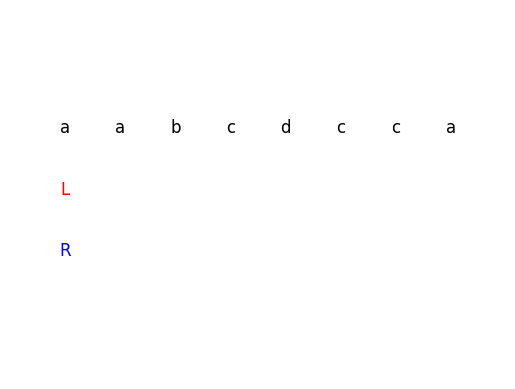

In [15]:
def longest_uniform_substring_after_replacements(s: int, k: int) -> int:
    # define variables, constants
    freqs = {}  # to store the char frequencies
    highest_freq = 0
    max_len = 0  # length of window
    left = 0
    right = 0
    len_s = len(s)

    while right < len_s:
        # get the freq at pointer right
        freqs[s[right]] = freqs.get(s[right], 0) + 1  # "a" : 1
        # get the highest frequency updated
        highest_freq = max(highest_freq, freqs[s[right]])  # max(0, 1) -> 1
        # calculate num of replacements
        num_chars_to_replace = (right - left + 1) - highest_freq
        if num_chars_to_replace > k:
            freqs[s[left]] -= 1
            left += 1
        max_len = right - left + 1
        right += 1
    return max_len


s = "aabcdcca"
k = 2

print(longest_uniform_substring_after_replacements(s, k))

5
